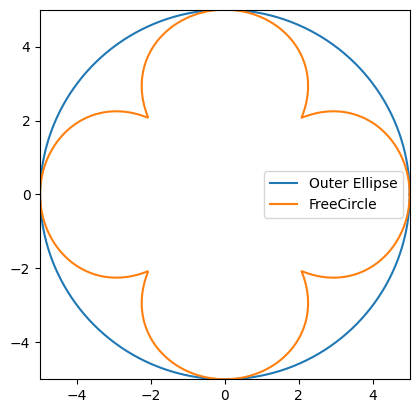

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def plot_FreeCircle(w, h, f):
    theta_values = np.linspace(0, 360, 1000)
    x_ellipse = w * np.cos(np.radians(theta_values))
    y_ellipse = h * np.sin(np.radians(theta_values))

    x_C = []
    y_C = []

    for theta in theta_values:
        # Find the intersection points of the full ray with the ellipse and wedge
        full_ray_x = np.cos(np.radians(theta))
        full_ray_y = np.sin(np.radians(theta))

        # Intersection with the ellipse
        t = w * h / np.sqrt((w * full_ray_y)**2 + (h * full_ray_x)**2)
        x_E = t * full_ray_x
        y_E = t * full_ray_y

        # Define the wedge lines based on the quadrant
        if theta <= 45 or (theta > 315 and theta <= 360):
            x_W = w
            y_W = x_W * np.tan(np.radians(theta))
        elif theta <= 135:
            y_W = h
            x_W = y_W / np.tan(np.radians(theta))
        elif theta <= 225:
            x_W = -w
            y_W = x_W * np.tan(np.radians(theta))
        else:
            y_W = -h
            x_W = y_W / np.tan(np.radians(theta))

        # Calculate WE and determine C
        WE = np.sqrt((x_E - x_W)**2 + (y_E - y_W)**2)
        shift = WE * f
        x_C.append(x_E - shift * full_ray_x)
        y_C.append(y_E - shift * full_ray_y)

    plt.plot(x_ellipse, y_ellipse, label='Outer Ellipse')
    plt.plot(x_C, y_C, label='FreeCircle')
    plt.xlim(-w, w)
    plt.ylim(-h, h)
    plt.legend()
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

plot_FreeCircle(5, 5, 1)


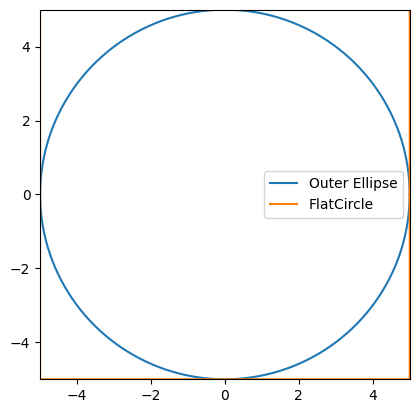

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def plot_FlatCircle(w, h, f):
    theta_values = np.linspace(0, 360, 1000)
    x_ellipse = w * np.cos(np.radians(theta_values))
    y_ellipse = h * np.sin(np.radians(theta_values))

    x_C = []
    y_C = []

    for theta in theta_values:
        # Find the intersection points of the full ray with the ellipse and wedge
        full_ray_x = np.cos(np.radians(theta))
        full_ray_y = np.sin(np.radians(theta))

        # Intersection with the ellipse
        t = w * h / np.sqrt((w * full_ray_y)**2 + (h * full_ray_x)**2)
        x_E = t * full_ray_x
        y_E = t * full_ray_y

        # Define the wedge lines based on the quadrant
        if theta <= 45 or (theta > 315 and theta <= 360):
            x_W = w
            y_W = x_W * np.tan(np.radians(theta))
        elif theta <= 135:
            y_W = h
            x_W = y_W / np.tan(np.radians(theta))
        elif theta <= 225:
            x_W = -w
            y_W = x_W * np.tan(np.radians(theta))
        else:
            y_W = -h
            x_W = y_W / np.tan(np.radians(theta))

        # Calculate WE and determine C
        WE = np.sqrt((x_E - x_W)**2 + (y_E - y_W)**2)
        shift = WE * f
        x_C.append(x_W + shift * full_ray_x)
        y_C.append(y_W + shift * full_ray_y)

    plt.plot(x_ellipse, y_ellipse, label='Outer Ellipse')
    plt.plot(x_C, y_C, label='FlatCircle')
    plt.xlim(-w, w)
    plt.ylim(-h, h)
    plt.legend()
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

plot_FlatCircle(5, 5, 0)


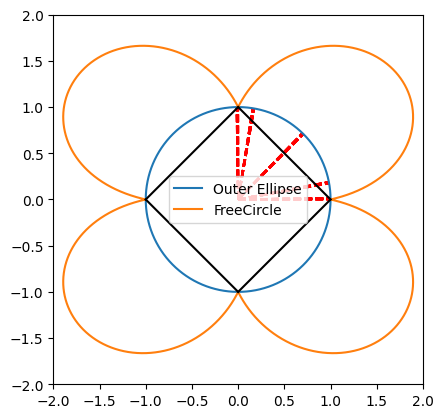

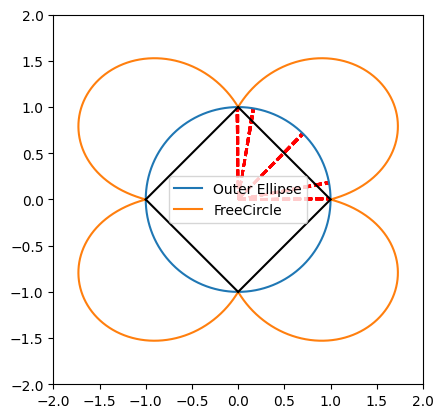

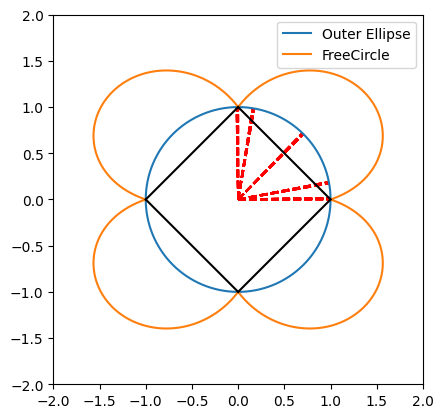

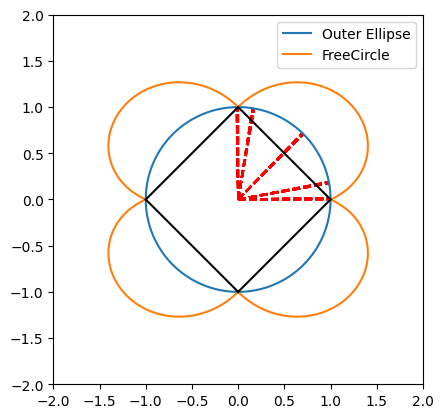

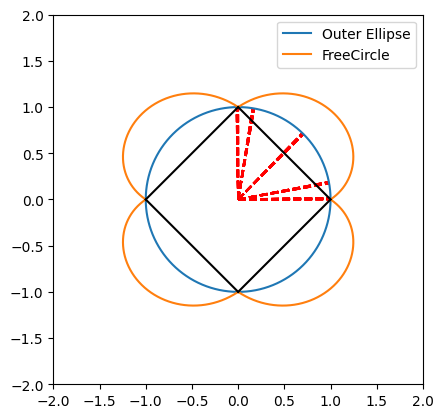

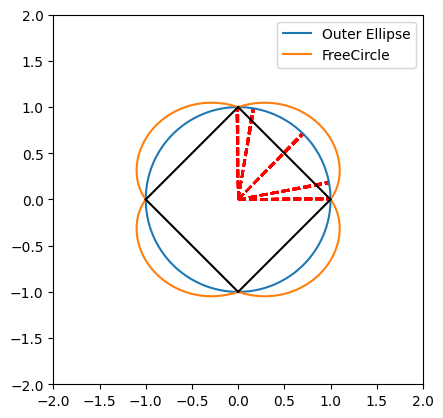

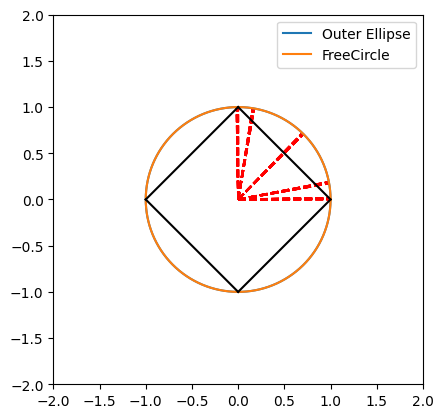

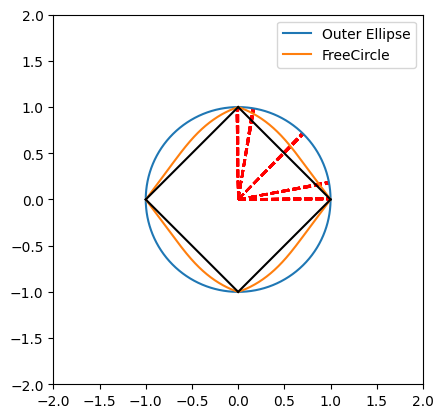

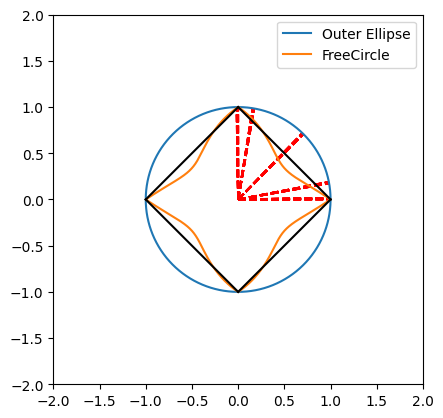

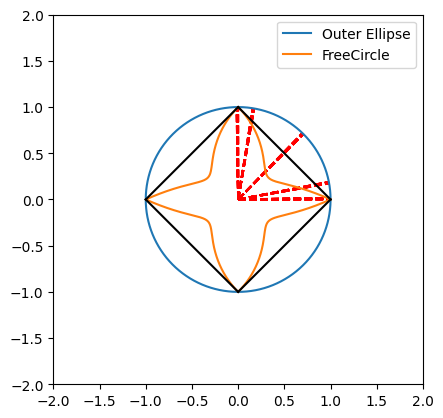

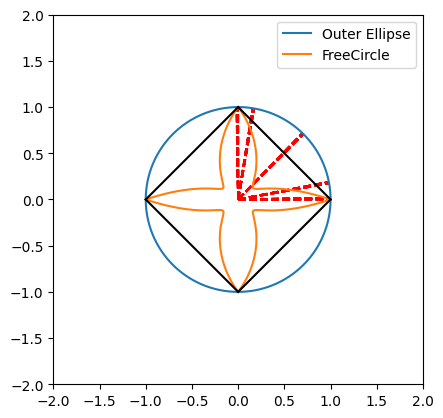

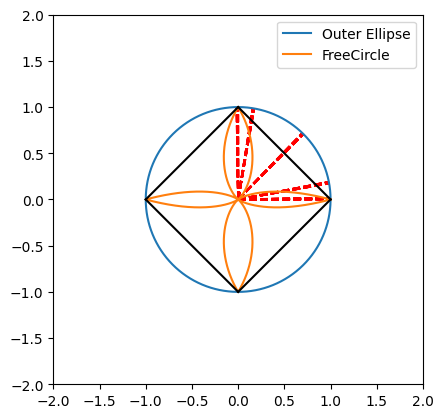

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def plot_FreeCircle_1(w, h, f, x_center=0, y_center=0, rays_angles=[0, 10, 45, 80, 90]):
    theta_values = np.linspace(0, 360, 10000)
    x_ellipse = w * np.cos(np.radians(theta_values)) + x_center
    y_ellipse = h * np.sin(np.radians(theta_values)) + y_center

    x_C = []
    y_C = []

    for theta in theta_values:
        full_ray_x = np.cos(np.radians(theta))
        full_ray_y = np.sin(np.radians(theta))

        # Intersection with the ellipse
        t = w * h / np.sqrt((w * full_ray_y)**2 + (h * full_ray_x)**2)
        x_E = t * full_ray_x + x_center
        y_E = t * full_ray_y + y_center

        # Define the wedge for each quadrant
        if theta <= 90:
            slope = -h / w
            intercept = h + y_center
        elif theta <= 180:
            slope = h / w
            intercept = h + y_center
        elif theta <= 270:
            slope = -h / w
            intercept = -h + y_center
        else:
            slope = h / w
            intercept = -h + y_center
        
        x_W = (full_ray_y - intercept) / (slope - full_ray_y / full_ray_x) + x_center
        y_W = slope * (x_W - x_center) + intercept

        # Calculate WE and determine C
        WE = np.sqrt((x_E - x_W)**2 + (y_E - y_W)**2)
        shift = WE * f
        x_C.append(x_E - shift * full_ray_x)
        y_C.append(y_E - shift * full_ray_y)

        # Draw full rays for selected angles
        if int(theta) in rays_angles:
            plt.plot([x_center, x_E], [y_center, y_E], 'r--')

    plt.plot(x_ellipse, y_ellipse, label='Outer Ellipse')
    plt.plot(x_C, y_C, label='FreeCircle')

    # Plot the wedge lines
    plt.plot([w + x_center, x_center], [y_center, h + y_center], 'k-') # Top-right quadrant
    plt.plot([x_center, -w + x_center], [h + y_center, y_center], 'k-') # Top-left quadrant
    plt.plot([-w + x_center, x_center], [y_center, -h + y_center], 'k-') # Bottom-left quadrant
    plt.plot([x_center, w + x_center], [-h + y_center, y_center], 'k-') # Bottom-right quadrant

    plt.xlim(-w + x_center - 1, w + x_center + 1)
    plt.ylim(-h + y_center - 1, h + y_center + 1)
    plt.legend()
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

for f in range(-6,6):
    plot_FreeCircle_1(1, 1, f/3.0, x_center=0, y_center=0)


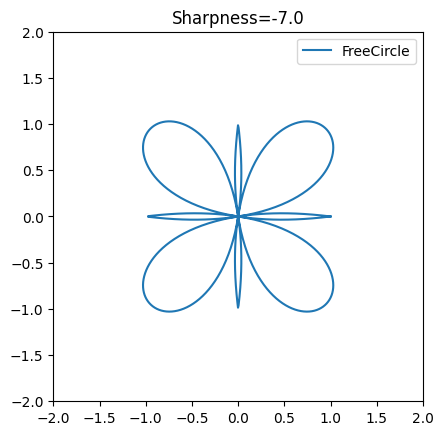

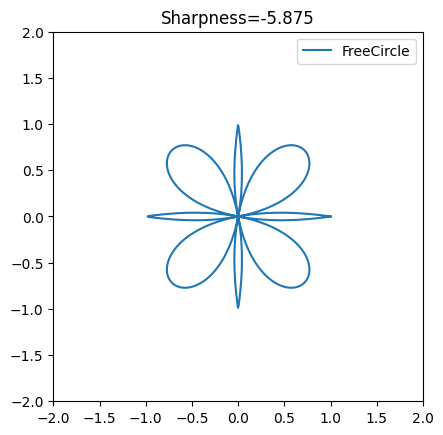

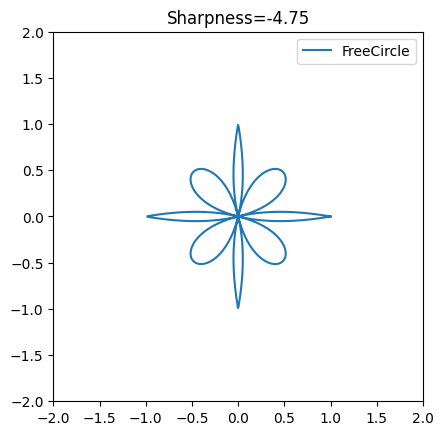

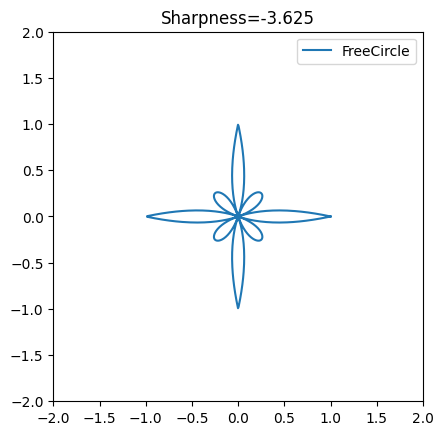

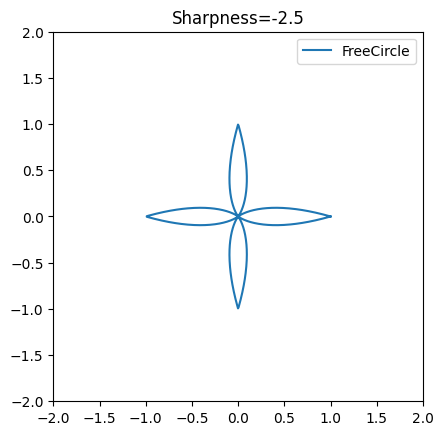

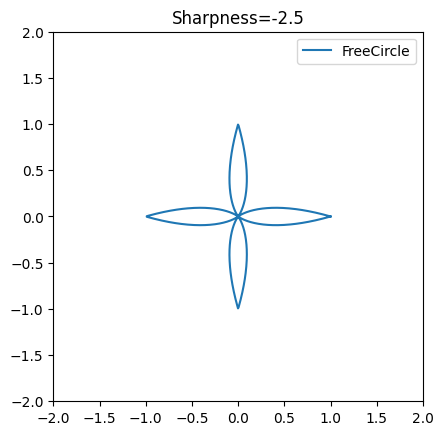

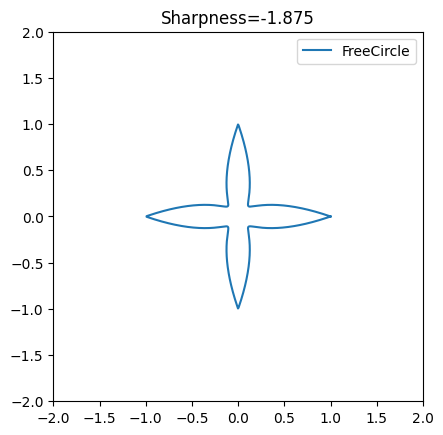

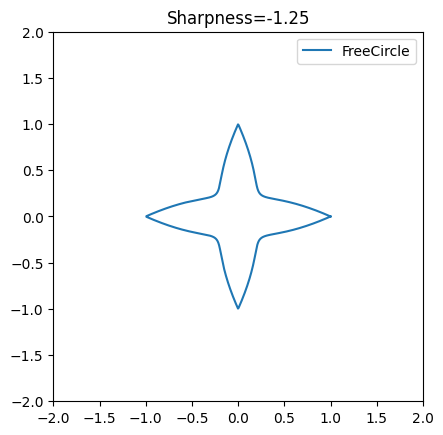

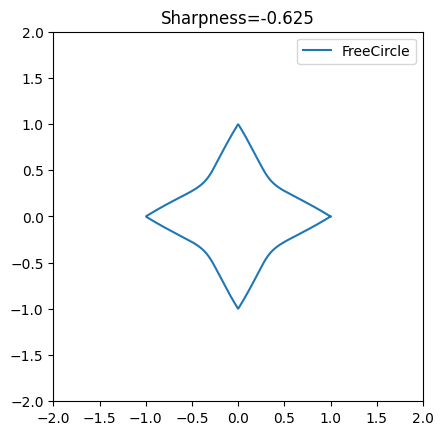

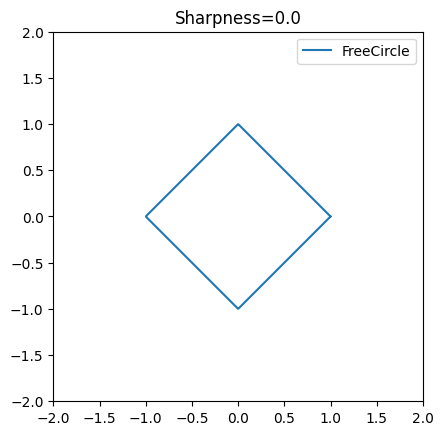

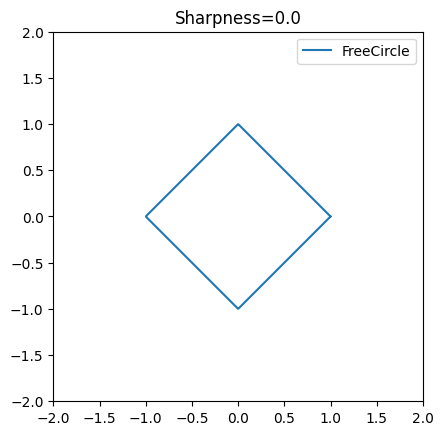

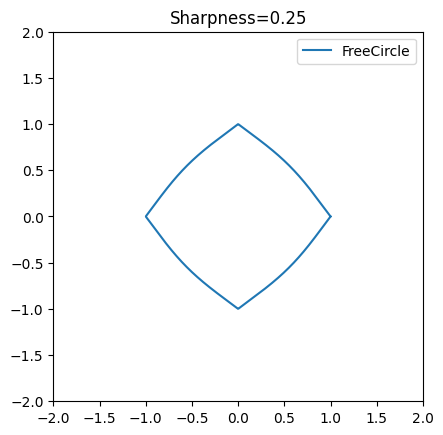

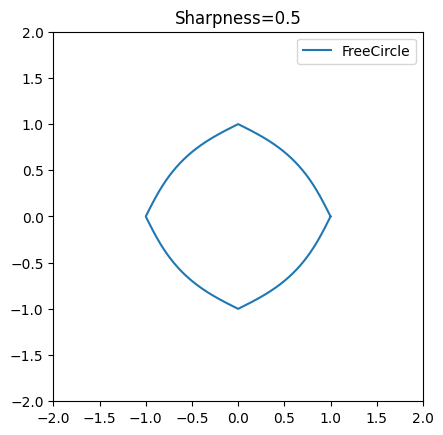

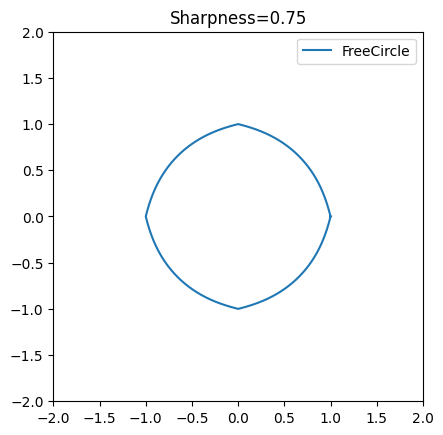

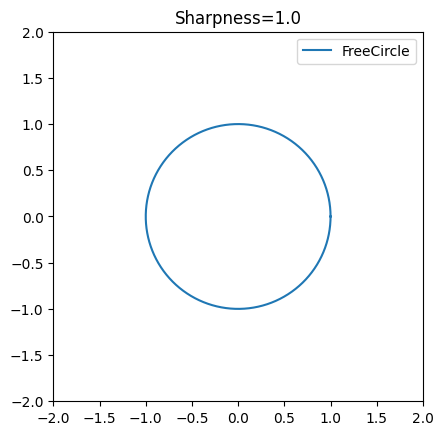

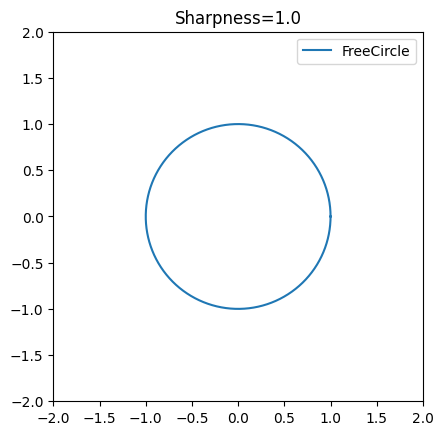

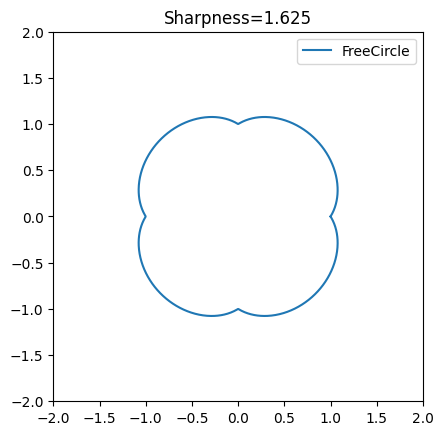

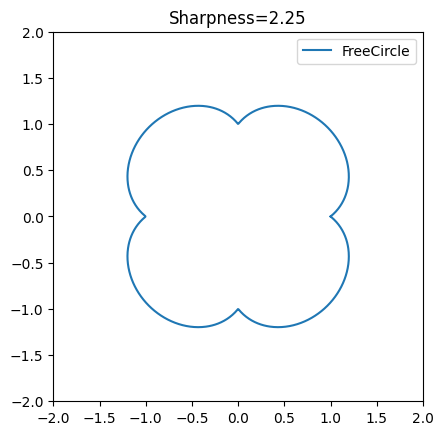

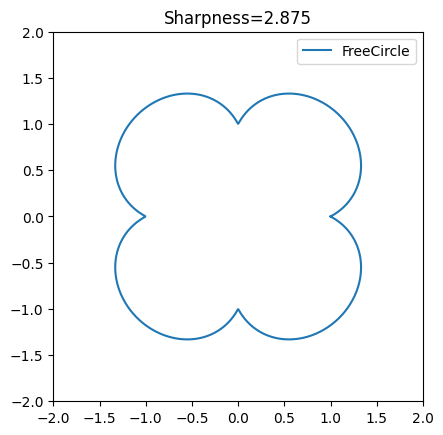

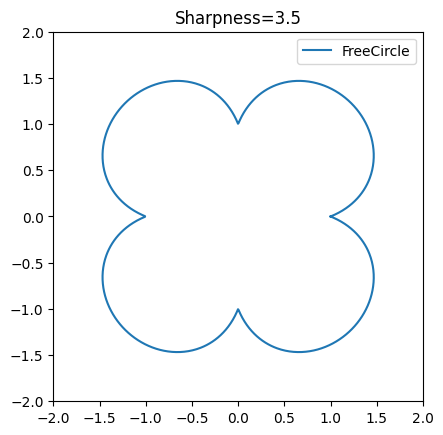

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def plot_FreeCircle(w, h, f, rays_angles=[0, 45, 90]):
    
    theta_values = np.linspace(0, 360, 1000)
    x_ellipse = w * np.cos(np.radians(theta_values))
    y_ellipse = h * np.sin(np.radians(theta_values))
    
    x_C, y_C = [], []

    for theta in theta_values:
        cos_theta = np.cos(np.radians(theta))
        sin_theta = np.sin(np.radians(theta))

        # Intersection with the ellipse (E)
        t = w * h / np.sqrt((w * sin_theta)**2 + (h * cos_theta)**2)
        x_E, y_E = t * cos_theta, t * sin_theta
        
        # Find slope and intercept of the ray
        if theta != 90 and theta != 270:
            slope_ray = np.tan(np.radians(theta))
            intercept_ray = 0  # Because it passes through the origin
            
            # Define the wedge line and find intersection (W)
            if theta < 90:
                slope_wedge = -h / w
                intercept_wedge = h
            elif theta < 180:
                slope_wedge = h / w
                intercept_wedge = h
            elif theta < 270:
                slope_wedge = -h / w
                intercept_wedge = -h
            else:
                slope_wedge = h / w
                intercept_wedge = -h
                
            # Solve for x_W and y_W
            x_W = (intercept_wedge - intercept_ray) / (slope_ray - slope_wedge)
            y_W = slope_ray * x_W + intercept_ray
            
        # Handle special cases
        else:
            x_W = 0
            y_W = h if theta == 90 else -h
        
        # Calculate WE and determine C
        WE = np.sqrt((x_E - x_W)**2 + (y_E - y_W)**2)
        shift = WE * f
        x_C.append(x_W + shift * cos_theta)
        y_C.append(y_W + shift * sin_theta)

        # # Draw full rays for selected angles
        # if int(theta) in rays_angles:
        #     plt.plot([0, x_W], [0, y_W], 'r--')

    # plt.plot(x_ellipse, y_ellipse, label='Outer Ellipse')
    plt.plot(x_C, y_C, label='FreeCircle')

    # Plot the wedge lines
    # plt.plot([0, w], [h, 0], 'k-') # Top-right quadrant
    # plt.plot([-w, 0], [0, h], 'k-') # Top-left quadrant
    # plt.plot([0, w], [-h, 0], 'k-') # Bottom-right quadrant
    # plt.plot([-w, 0], [0, -h], 'k-') # Bottom-left quadrant

    plt.title(f"Sharpness={f}")
    plt.xlim(-w-1, w+1)
    plt.ylim(-h-1, h+1)
    plt.legend()
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()


z_values = np.concatenate([np.linspace(-7, -2.5, 5), np.linspace(-2.5, 0, 5), np.linspace(0, 1, 5), np.linspace(1, 3.5, 5)])

for f in z_values:
    plot_FreeCircle(1, 1, f)

In [5]:
from svgwrite import Drawing
import numpy as np

def draw_FreeCircle_svg(tile_size, f, x_shift=0, y_shift=0, rotation_degrees=0, filename=None, path=None, dwg=None):
    """
    t - tile size in inches
    f - sharpness factor
    filename - e.g. "freecircle_1.svg" 
    """
    w, h = tile_size, tile_size
    viewbox_max = tile_size * 5
    
    if path is None:
        dwg = Drawing(filename, size=(2 * viewbox_max, 2 * viewbox_max), viewBox=(f"-{viewbox_max} -{viewbox_max} {2*viewbox_max} {2*viewbox_max}"))
        path = dwg.path(d=None, fill='none', stroke='black')
        dwg.add(path)

    num_points = 180
    theta_values = np.linspace(0, 360, num_points)
    x_C = []
    y_C = []

    first_point_drawn = False
    
    for theta_raw in theta_values:
        # Rotate
        theta = (theta_raw + rotation_degrees) % 360
        
        cos_theta = np.cos(np.radians(theta))
        sin_theta = np.sin(np.radians(theta))

        # Intersection with the ellipse (E)
        t = w * h / np.sqrt((w * sin_theta)**2 + (h * cos_theta)**2)
        x_E, y_E = t * cos_theta, t * sin_theta
        
        # Find slope and intercept of the ray
        if theta != 90 and theta != 270:
            slope_ray = np.tan(np.radians(theta))
            intercept_ray = 0  # Because it passes through the origin
            
            # Define the wedge line and find intersection (W)
            if theta < 90:
                slope_wedge = -h / w
                intercept_wedge = h
            elif theta < 180:
                slope_wedge = h / w
                intercept_wedge = h
            elif theta < 270:
                slope_wedge = -h / w
                intercept_wedge = -h
            else:
                slope_wedge = h / w
                intercept_wedge = -h
                
            # Solve for x_W and y_W
            x_W = (intercept_wedge - intercept_ray) / (slope_ray - slope_wedge)
            y_W = slope_ray * x_W + intercept_ray
            
        # Handle special cases
        else:
            x_W = 0
            y_W = h if theta == 90 else -h
        
        # Calculate WE and determine C
        WE = np.sqrt((x_E - x_W)**2 + (y_E - y_W)**2)
        shift = WE * f
        x_C.append(x_W + shift * cos_theta)
        y_C.append(y_W + shift * sin_theta)

        # If it's the first point, move to that point
        if not first_point_drawn:
            first_point_drawn = True
            path.push("M", (x_C[-1] + x_shift, y_C[-1] + y_shift))
            # path.push("L", (x_C[-1] + x_shift, y_C[-1] + y_shift))
        # Else, draw a line to the next point
        else:
            path.push("L", (x_C[-1] + x_shift, y_C[-1] + y_shift))

    if filename and dwg:
        dwg.save()
    return path

# Example usage
draw_FreeCircle_svg(tile_size=100, f=0, rotation_degrees=45, filename='freecircle.svg')

# Example usage:
tile_size = 100
sharpness_vals = [-5, -2.5, -2, -1, -0.5, 0, 0.5, 1, 2, 2.5, 4]
viewbox_max = tile_size*2*len(sharpness_vals)
dwg = Drawing("tiled_moving.svg", size=(2 * viewbox_max, 2 * tile_size), viewBox=(f"-{tile_size*2} -{tile_size*2} {2*viewbox_max} {2*tile_size}"))
path = dwg.path(d=None, fill='grey', stroke='black')

for i in range(len(sharpness_vals)):
    f = sharpness_vals[i]
    x_shift = i * (tile_size * 3)
    path = draw_FreeCircle_svg(tile_size, f, x_shift=x_shift, filename=f"FreeCircle_{f}.svg", path=path)
dwg.add(path)
dwg.save()

In [6]:
import math
from svgwrite import Drawing

WIDTH_TILES = 23
HEIGHT_TILES = 13
TILE_SIZE = 50

VIEWBOX_WIDTH = WIDTH_TILES * TILE_SIZE
VIEWBOX_HEIGHT = HEIGHT_TILES * TILE_SIZE

CENTER_X = int(WIDTH_TILES / 2)
CENTER_Y = int(HEIGHT_TILES / 2)
CENTER = (CENTER_X, CENTER_Y)

# MAPPING = "sine_4" # linear, sine_1, sine_4, sine_grid

def linear_map(start_value, end_value, distance_ratio):
    interval = end_value - start_value
    # distance_ratio = distance/float(max_distance)
    return start_value + distance_ratio * interval

def convert_normalized_sharpness_to_raw(normalized_input):
    # The raw "sharpness" value for the shape is cool and all, but we want to remap it so that these shapes are produced:
    # new_sharpness = -1 ==> returns the clover flower shape (raw_sharpness=-5.8)
    # new_sharpness = -0.5 ==> returns the closed 4 petal shape (raw_sharpness=-2.5)
    # new_sharpness = 0 ==> returns square (raw_sharpness=1)
    # new_sharpness = 1 ==> returns circle (raw_sharpness=1)
    input_intervals = [-1, 0.5, 1] # Assumed sorted
    output_intervals = [-5.8, 0, 1] # Assumed to be the same size as input_intervals
    # First, given the input, find the start and end of that interval. The input must be within the input intervals
    for i in range(len(input_intervals)):
        if input_intervals[i] == normalized_input:
            return output_intervals[i] # For this base case, return the exact value. This makes it easier to implement bounds
        elif input_intervals[i] > normalized_input:
            interval_end = input_intervals[i]
            interval_start = input_intervals[i-1] # Look at previous element. This will fail if normalized_input is smaller than the first element of the input interval
            interval_size = interval_end-interval_start # Guaranteed to be positive since input_intervals is sorted
            distance = normalized_input-interval_start
            distance_ratio = distance / interval_size
            return linear_map(output_intervals[i-1], output_intervals[i], distance_ratio)
        # Otherwise, let the for-loop iterate to the next element
    return None # Should not hit this

# Y = amplitude * sin(k*(x-shift)) where period = 2*PI/k
# distance_ratio must be a float on the interval [0,1]
def sine_distance_map(min_value, max_value, distance_ratio, period, shift=0):
    amplitude = (max_value - min_value)/2
    period_factor = 2*math.pi/period
    midpoint = (max_value + min_value) / 2.0
    return midpoint + amplitude*math.sin(period_factor*(distance_ratio + shift))

def grid_sine_map(min_value, max_value, x_period, y_period, x_shift, y_shift, x, y):
    x_ratio = float(x)/WIDTH_TILES
    
    y_ratio = float(y)/HEIGHT_TILES

    return sine_distance_map(min_value, max_value, x_ratio, x_period, shift=x_shift) + sine_distance_map(min_value, max_value, y_ratio, y_period, shift=y_shift)


def calculate_distance(point1, point2):
    x1,y1 = point1
    x2,y2 = point2
    return math.sqrt((x1-x2)**2 + (y1-y2)**2)

def calculate_sharpness(x, y):
    point = (x,y)
    
    distance_to_origin = calculate_distance(point, CENTER)
    # max_distance = max(calculate_distance(CENTER, (0,0)), calculate_distance(CENTER, (WIDTH_TILES,0)), calculate_distance(CENTER, (0,HEIGHT_TILES)), calculate_distance(CENTER, (WIDTH_TILES,HEIGHT_TILES)))
    max_distance = max(calculate_distance(CENTER, (WIDTH_TILES,y)), calculate_distance(CENTER, (x,HEIGHT_TILES)))
    distance_ratio = distance_to_origin/float(max_distance)
    
    sharpness = None
    if MAPPING == "linear":
        # Map to 1->-7
        normalized_sharpness = linear_map(1,-1, distance_ratio)
    elif MAPPING == "sine_1":
        # Map to 1->-7 just once
        max_distance = max(calculate_distance(CENTER, (WIDTH_TILES,y)), calculate_distance(CENTER, (x,HEIGHT_TILES)))
        distance_ratio = distance_to_origin/float(max_distance)
        normalized_sharpness = sine_distance_map(-1,1, distance_ratio, period=1, shift=0)
    elif MAPPING == "sine_4":
        # Map to 1->0 4 times
        normalized_sharpness = sine_distance_map(-1,1, distance_ratio, period=0.25)
    elif MAPPING == "sine_grid_normalized_lg":
        normalized_sharpness = grid_sine_map(-0.5, 0.5, 8.0/WIDTH_TILES, 8.0/HEIGHT_TILES, 1, 3, x, y)
    elif MAPPING == "sine_grid_denormalized_lg":
        sharpness = grid_sine_map(-2.5, 0.5, 8.0/WIDTH_TILES, 8.0/HEIGHT_TILES, 1, 3, x, y)
    elif MAPPING == "sine_grid_normalized_sm":
        normalized_sharpness = grid_sine_map(-0.5, 0.5, 4.0/WIDTH_TILES, 4.0/HEIGHT_TILES, 1, 3, x, y)
    elif MAPPING == "sine_grid_denormalized_sm":
        sharpness = grid_sine_map(-2.5, 0.5, 4.0/WIDTH_TILES, 4.0/HEIGHT_TILES, 1, 3, x, y)

    if sharpness is None:
        sharpness = convert_normalized_sharpness_to_raw(normalized_sharpness)

    return sharpness

for MAPPING in ['linear', 'sine_1', 'sine_4', 'sine_grid_normalized_lg', 'sine_grid_denormalized_lg', 'sine_grid_normalized_sm', 'sine_grid_denormalized_lg']:
    dwg = Drawing(f"grid_{MAPPING}.svg", size=(VIEWBOX_WIDTH, VIEWBOX_HEIGHT), viewBox=(f"-{TILE_SIZE} -{TILE_SIZE} {2*VIEWBOX_WIDTH} {2*VIEWBOX_HEIGHT}"))
    path = dwg.path(d=None, fill='orange', stroke='black')
    
    for x in range(WIDTH_TILES):
        for y in range(HEIGHT_TILES):
            sharpness = calculate_sharpness(x, y)
            
            # rotation = math.tanh(float(x)/y)
            x_shift = x * TILE_SIZE * 2
            y_shift = y * TILE_SIZE * 2
            path = draw_FreeCircle_svg(TILE_SIZE, sharpness, x_shift=x_shift, y_shift=y_shift, filename=None, path=path)
    dwg.add(path)
    dwg.save()

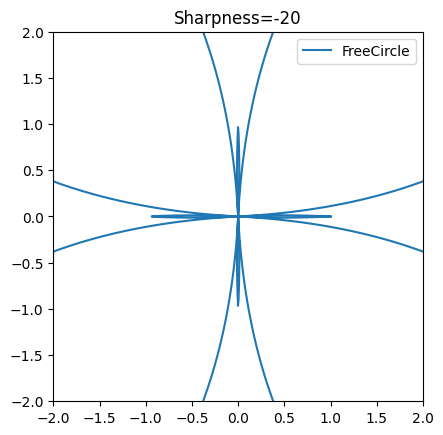

In [7]:
    plot_FreeCircle(1, 1, -20)